# Plot Pendulum Results

In [1]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import tqdm

In [2]:
LOGROOTDIR = './solve-pendulum-data/'

## Plotter

In [3]:
def plot_pendulum_fig(cost_log, traj):
    
    t = traj['t']
    x = traj['x']
    u = traj['u']

    # create datasheet
    H = x.shape[0] - 1
    M = x.shape[1]
    datasheet = []
    for i in range(H+1):
        for j in range(M):
            datasheet.append({
                't': t[i, j, 0].item(),
                'theta': x[i, j, 0].item(),
                'omega': x[i, j, 1].item(),
                'u': u[i, j, 0].item(),
            })
    datasheet = pd.DataFrame(datasheet)

    fig, axes = plt.subplots(2, 2, figsize=(7.2*1.7, 7.2))
    axes = axes.flatten()

    # cost iteration
    cost_iter = [cost_log.iloc[0]['cost']]
    # drop failing to improve iterations
    for i in range(len(cost_log)-1):
        cost = cost_log.iloc[i+1]['cost']
        if cost < cost_iter[-1]:
            cost_iter.append(cost)
    axes[0].plot(cost_iter, marker='^')
    axes[0].set_ylabel('COST')
    axes[0].set_xlabel('policy iteration step')
    axes[0].set_title('(a)', loc='center')

    # angle
    sns.lineplot(data=datasheet, x='t', y='theta', errorbar='sd', ax=axes[1])
    axes[1].set_ylabel(r'$\theta$')
    axes[1].set_xticks([0.0, 0.25,  0.5, 0.75, 1.0, 1.25, 1.5])
    axes[1].set_title('(b)', loc='center')

    # angular rate
    sns.lineplot(data=datasheet, x='t', y='omega', errorbar='sd', ax=axes[2])
    axes[2].set_ylabel(r'$\dot\theta$')
    axes[2].set_xticks([0.0, 0.25,  0.5, 0.75, 1.0, 1.25, 1.5])
    axes[2].set_title('(c)', loc='center')

    # control
    sns.lineplot(data=datasheet, x='t', y='u', errorbar='sd', ax=axes[3])
    axes[3].set_ylabel(r'$a$')
    axes[3].set_xticks([0.0, 0.25,  0.5, 0.75, 1.0, 1.25, 1.5])
    axes[3].set_title('(d)', loc='center')

    fig.tight_layout()

    return fig

## On-policy Set (a)

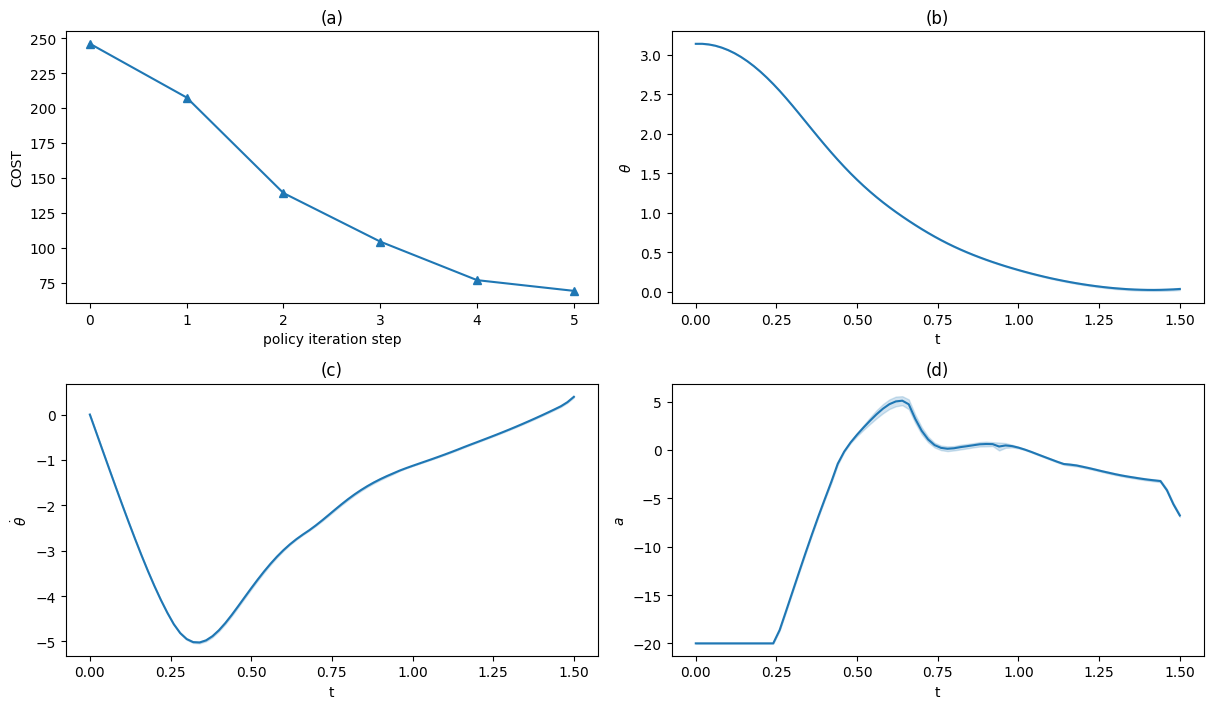

In [4]:
# load data

cost_log = pd.read_csv(os.path.join(LOGROOTDIR, 'calc_loss_1.csv'))
cost_log

traj = torch.load(os.path.join(LOGROOTDIR, 'calc_loss_1.pt'))

fig = plot_pendulum_fig(cost_log, traj)
fig.savefig(os.path.join(LOGROOTDIR, 'calc_loss_1.pdf'))

## Off-policy Set (a)

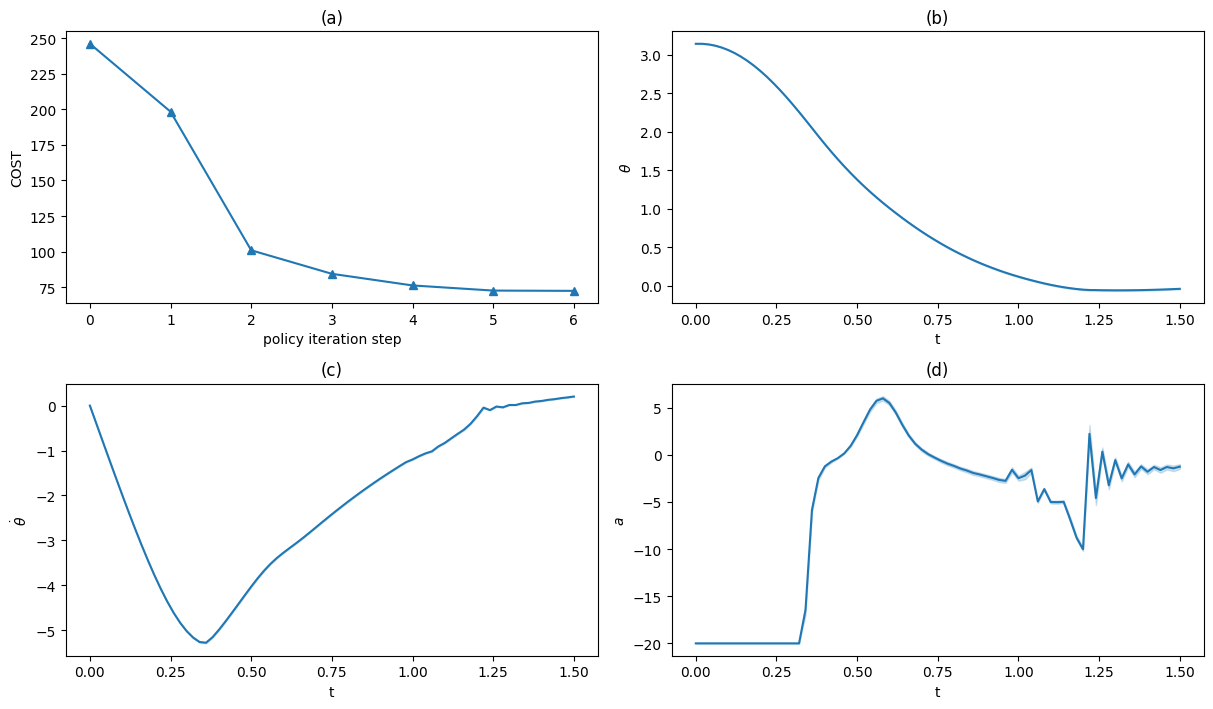

In [5]:
# load data

cost_log = pd.read_csv(os.path.join(LOGROOTDIR, 'calc_loss_1_off.csv'))
cost_log

traj = torch.load(os.path.join(LOGROOTDIR, 'calc_loss_1_off.pt'))

fig = plot_pendulum_fig(cost_log, traj)
fig.savefig(os.path.join(LOGROOTDIR, 'calc_loss_1_off.pdf'))

## On-policy Set (b)

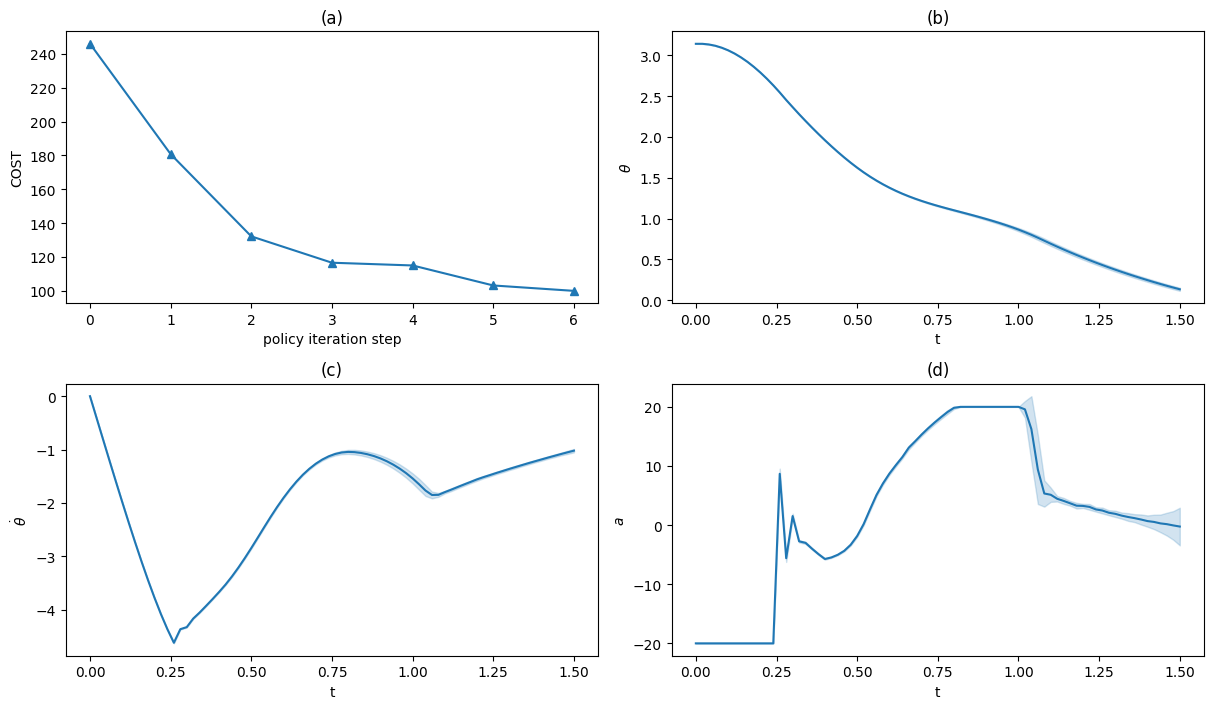

In [6]:
# load data

cost_log = pd.read_csv(os.path.join(LOGROOTDIR, 'calc_loss_2.csv'))
cost_log

traj = torch.load(os.path.join(LOGROOTDIR, 'calc_loss_2.pt'))

fig = plot_pendulum_fig(cost_log, traj)
fig.savefig(os.path.join(LOGROOTDIR, 'calc_loss_2.pdf'))

## Off-policy Set (b)

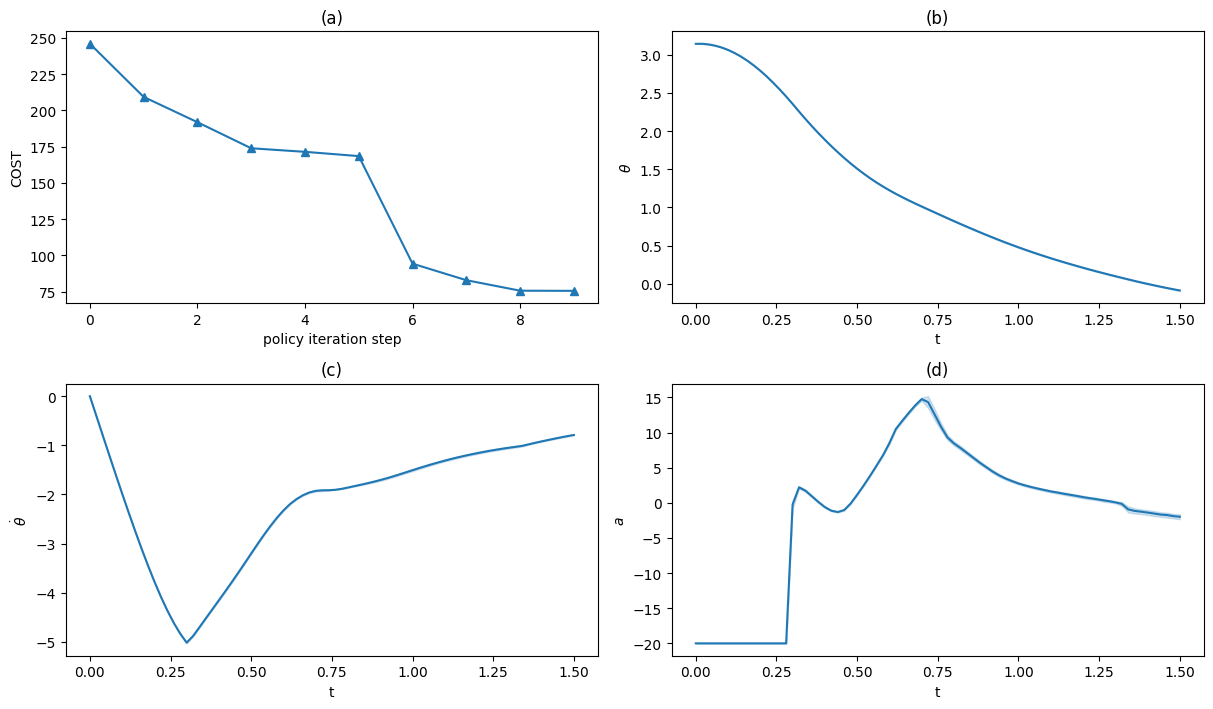

In [7]:
# load data

cost_log = pd.read_csv(os.path.join(LOGROOTDIR, 'calc_loss_2_off.csv'))
cost_log

traj = torch.load(os.path.join(LOGROOTDIR, 'calc_loss_2_off.pt'))

fig = plot_pendulum_fig(cost_log, traj)
fig.savefig(os.path.join(LOGROOTDIR, 'calc_loss_2_off.pdf'))

## On-policy set (d)

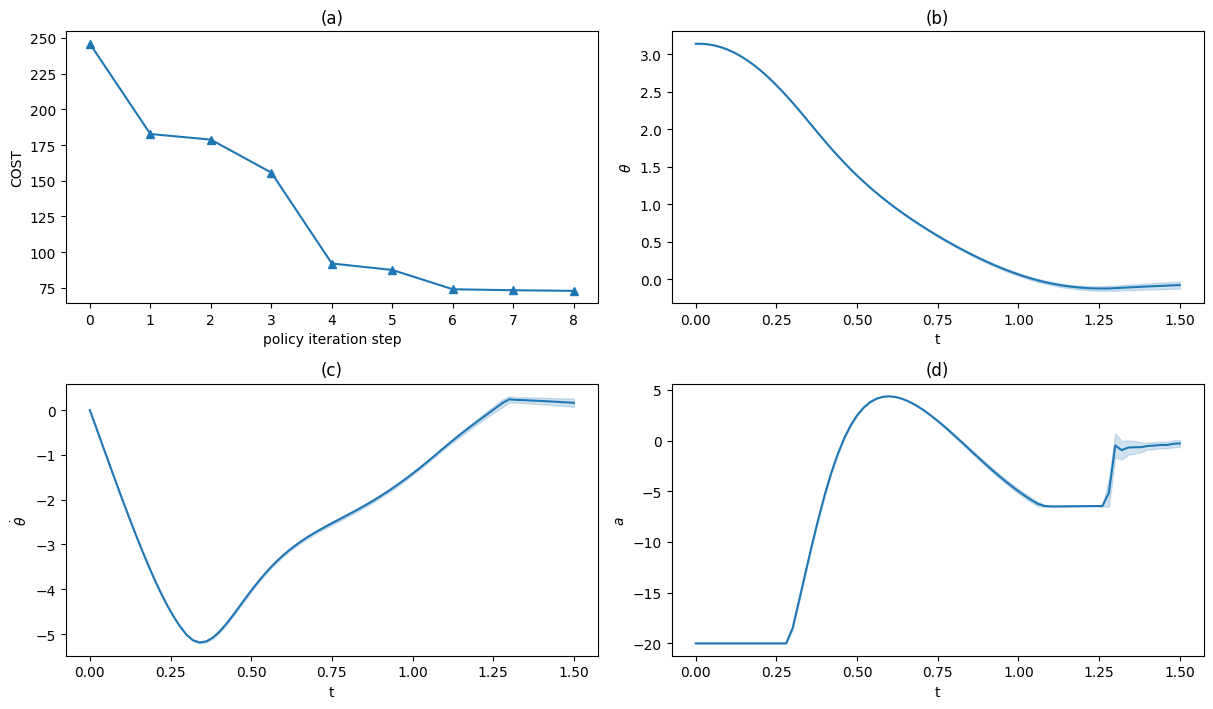

In [8]:
# load data

cost_log = pd.read_csv(os.path.join(LOGROOTDIR, 'calc_loss_8.csv'))
cost_log

traj = torch.load(os.path.join(LOGROOTDIR, 'calc_loss_8.pt'))

fig = plot_pendulum_fig(cost_log, traj)
fig.savefig(os.path.join(LOGROOTDIR, 'calc_loss_8.pdf'))

## Off-policy Set (d)

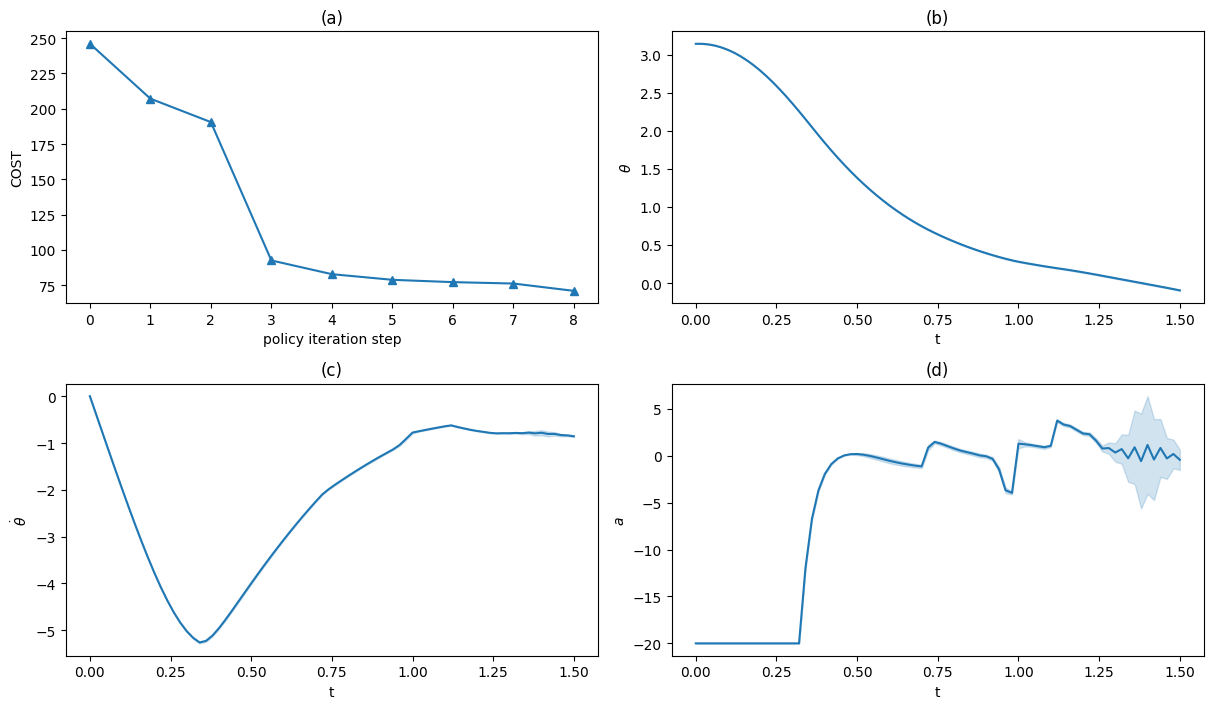

In [9]:
# load data

cost_log = pd.read_csv(os.path.join(LOGROOTDIR, 'calc_loss_8_off.csv'))
cost_log

traj = torch.load(os.path.join(LOGROOTDIR, 'calc_loss_8_off.pt'))

fig = plot_pendulum_fig(cost_log, traj)
fig.savefig(os.path.join(LOGROOTDIR, 'calc_loss_8_off.pdf'))

## All in One

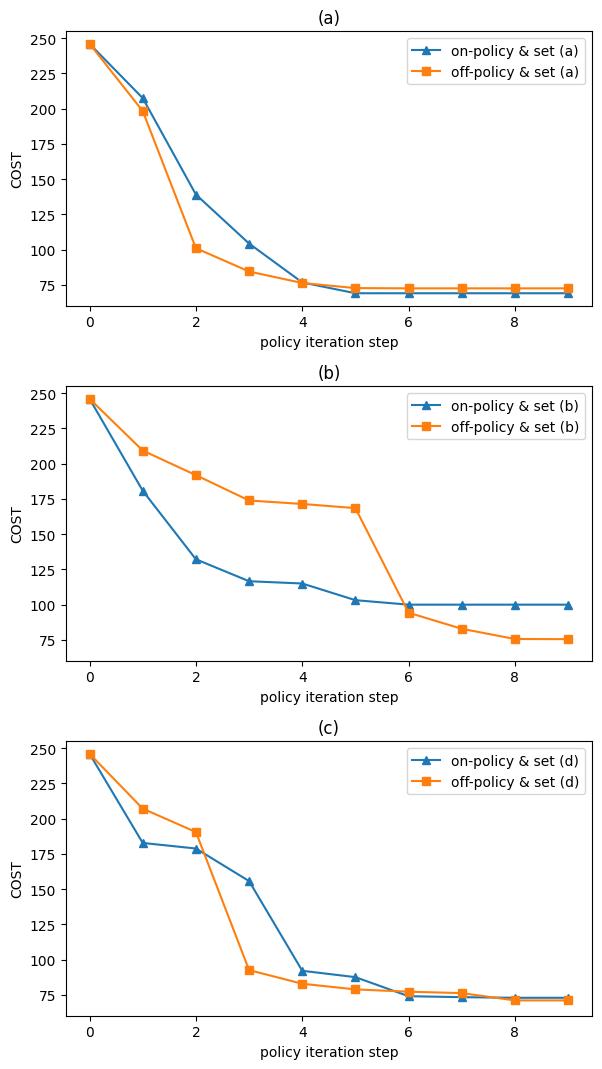

In [10]:
cost_logs = {
    'calc_loss_1': None,
    'calc_loss_1_off': None,
    'calc_loss_2': None,
    'calc_loss_2_off': None,
    'calc_loss_8': None,
    'calc_loss_8_off': None,
}

for loss_name in cost_logs:
    # load data
    cost_df = pd.read_csv(os.path.join(LOGROOTDIR, f'{loss_name}.csv'))
    # cost at each iteration
    cost_iter = [cost_df.iloc[0]['cost']]
    # drop failing to improve iterations
    for i in range(len(cost_df)-1):
        cost = cost_df.iloc[i+1]['cost']
        if cost < cost_iter[-1]:
            cost_iter.append(cost)
    cost_logs[loss_name] = cost_iter

# unifying iteration lengths
max_iteration = max(len(v) for v in cost_logs.values())
for loss_name in cost_logs:
    last_value = cost_logs[loss_name][-1]
    cost_logs[loss_name] += [last_value] * (max_iteration - len(cost_logs[loss_name]))

labels = (
    ('calc_loss_1', 'on-policy & set (a)', '^-b'),
    ('calc_loss_1_off', 'off-policy & set (a)', 's-b'),
    ('calc_loss_2', 'on-policy & set (b)', '^-m'),
    ('calc_loss_2_off', 'on-policy & set (b)', 's-m'),
    ('calc_loss_8', 'on-policy & set (b)', '^-c'),
    ('calc_loss_8_off', 'on-policy & set (b)', 's-c'),
)

fig, axes = plt.subplots(3, 1, figsize=(3.6 * 1.7, 3.6*3), sharey=True)

axes[0].plot(cost_logs['calc_loss_1'], '^-', label='on-policy & set (a)')
axes[0].plot(cost_logs['calc_loss_1_off'], 's-', label='off-policy & set (a)')
axes[0].set_ylabel('COST')
axes[0].set_xlabel('policy iteration step')
axes[0].set_title('(a)', loc='center')
axes[0].legend()

axes[1].plot(cost_logs['calc_loss_2'], '^-', label='on-policy & set (b)')
axes[1].plot(cost_logs['calc_loss_2_off'], 's-', label='off-policy & set (b)')
axes[1].set_ylabel('COST')
axes[1].set_xlabel('policy iteration step')
axes[1].set_title('(b)', loc='center')
axes[1].legend()

axes[2].plot(cost_logs['calc_loss_8'], '^-', label='on-policy & set (d)')
axes[2].plot(cost_logs['calc_loss_8_off'], 's-', label='off-policy & set (d)')
axes[2].set_ylabel('COST')
axes[2].set_xlabel('policy iteration step')
axes[2].set_title('(c)', loc='center')
axes[2].legend()

fig.tight_layout()
fig.savefig(os.path.join(LOGROOTDIR, 'pendulum-all-in-one.pdf'))